# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("Resources/Week14-Day2-Activity1-winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

2022-05-28 11:16:07.947841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 37.8144 - mse: 37.8144 - val_loss: 31.0842 - val_mse: 31.0842
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 34.3505 - mse: 34.3505 - val_loss: 27.7273 - val_mse: 27.7273
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 31.2625 - mse: 31.2625 - val_loss: 24.5638 - val_mse: 24.5638
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 28.4198 - mse: 28.4198 - val_loss: 21.6043 - val_mse: 21.6043
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 25.7448 - mse: 25.7448 - val_loss: 18.8048 - val_mse: 18.8048
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 23.1865 - mse: 23.1865 - val_loss: 16.2425 - val_mse: 16.2425
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 20.7202 - mse: 20.7202 - val_loss: 13.8645 - val_mse: 13.8645
Epoch 8/200
35/35 [==============================] - 0s

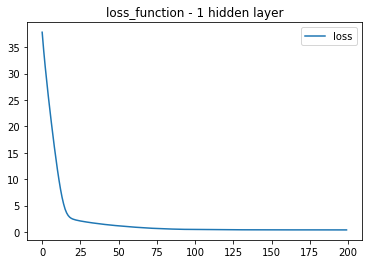

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 0s 4ms/step - loss: 32.4584 - mse: 32.4584 - val_loss: 31.0463 - val_mse: 31.0463
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 30.6945 - mse: 30.6945 - val_loss: 29.6648 - val_mse: 29.6648
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 28.8926 - mse: 28.8926 - val_loss: 28.0884 - val_mse: 28.0884
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 26.5492 - mse: 26.5492 - val_loss: 26.0872 - val_mse: 26.0872
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 23.6190 - mse: 23.6190 - val_loss: 23.6702 - val_mse: 23.6702
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 20.1605 - mse: 20.1605 - val_loss: 20.7824 - val_mse: 20.7824
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 16.3587 - mse: 16.3587 - val_loss: 17.5203 - val_mse: 17.5203
Epoch 8/200
35/35 [==============================] - 0s

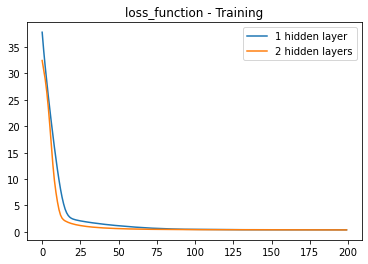

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

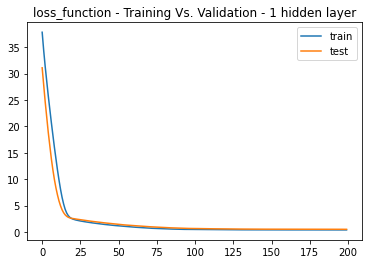

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

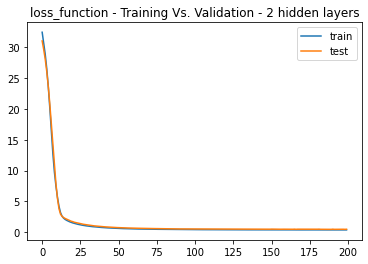

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()